In [2]:
import numpy as np
import pandas as pd
from scipy import integrate, signal
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from toy_models import *
%matplotlib widget

## Toy Model 2D

In [7]:
alpha = 10
beta = 10
J12 = 5
Jmax = 1
theta0 = np.radians(20)
Jinit = 1

omega1 = 0

t = np.linspace(0, 1000, 6000)
#res2 = []

#open file and write header
with open(f'res_2tar/a{alpha}_b{beta}_Ji{Jinit}_J12{J12}_Jm{Jmax}_t{np.degrees(theta0)}_dense.txt', 'w') as f:
    # write parameters in the first line
    f.write(f'alpha\tbeta\tJinit\tJ12\tJmax\ttheta0\n')
    f.write(f'{alpha}\t{beta}\t{Jinit}\t{J12}\t{Jmax}\t{theta0}\n\n')
    
    f.write('omega\ttheta1_i\ttheta2_i\ttheta1_f\ttheta2_f\tJ1_f\tJ2_f\n')

    # solve the system of equations for different omega and different initial conditions on theta1 and theta2
    for omega2 in np.linspace(0, np.radians(90), 10):
        params = [alpha, beta, J12, Jmax, theta0, omega2, -omega2]
        for theta1 in np.linspace(np.radians(0), np.pi/2, 10):
            for theta2 in np.linspace(-np.pi/2, np.radians(0), 10):
                x0 = (theta1, theta2, Jinit, Jinit)
                res_ODE = odeint(f_2D, x0, t, args=(params,))
                #res_ODE = integrate.solve_ivp(lambda t, x: f_2D(x, t, params), [t[0], t[-1]], x0, t_eval=t)
                #f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE.y[0,-1]}\t{res_ODE.y[1,-1]}\t{res_ODE.y[2,-1]}\t{res_ODE.y[3,-1]}\n')
                f.write(f'{omega2}\t{theta1}\t{theta2}\t{res_ODE[-1, 0]}\t{res_ODE[-1, 1]}\t{res_ODE[-1, 2]}\t{res_ODE[-1, 3]}\n')


/home/eleonora/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


# No feedbck

In [24]:
J12 = 50
Jmax = 1
theta0 = np.radians(20)

# t = np.linspace(0, 5000, 6000)
t = np.linspace(0, 100, 1001)
#res2 = []

#open file and write header
with open(f'res_2tar/J12{J12}_Jm{Jmax}_t{np.degrees(theta0)}_nofeed.txt', 'w') as f:
    # write parameters in the first line
    f.write(f'J12\tJmax\ttheta0\n')
    f.write(f'{J12}\t{Jmax}\t{theta0}\n\n')
    
    f.write('omega\ttheta1_i\ttheta2_i\ttheta1_f\ttheta2_f\n')

    # solve the system of equations for different omega and different initial conditions on theta1 and theta2
    for omega in np.linspace(0, np.radians(90), 30):
        params = [J12, Jmax, theta0, omega, -omega]
        for theta1 in np.linspace(np.radians(10), np.radians(90), 10):
            for theta2 in np.linspace(np.radians(-90), np.radians(-10), 10):
                x0 = (theta1, theta2)
                # res_ODE = odeint(f_2D_nofeed, x0, t, args=(params,))
                res_ODE = integrate.solve_ivp(lambda t, x: f_2D_nofeed(x, t, params), [t[0], t[-1]], x0, t_eval=None)
                f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE.y[0,-1]}\t{res_ODE.y[1,-1]}\n')
                # f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE[-1, 0]}\t{res_ODE[-1, 1]}\n')


## Toy Model Extended - with x, y dynamics

In [2]:
# FAR TARGETS

res_far = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_far = [0.01, 0.0008, 60, 6, np.radians(52), 800, 800]

#time points
t = np.linspace(0, 650, 500)

for _ in range(50):
    # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
    x0 = [0, 0, np.random.uniform(-np.pi/2, np.pi/2), np.random.uniform(-np.pi/2, np.pi/2), 2, 2]
    res_far.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_far), [t[0], t[-1]], x0, t_eval=t))

############################################################################################################

# CLOSE TARGET

res_close = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_close = [0.01, 0.0008, 60, 6, np.radians(52), 500, 800]

for _ in range(50):
    # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
    x0 = [0, 0, np.random.uniform(-np.pi/2, np.pi/2), np.random.uniform(-np.pi/2, np.pi/2), 2, 2]
    res_close.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_close), [t[0], t[-1]], x0, t_eval=t))

KeyboardInterrupt: 

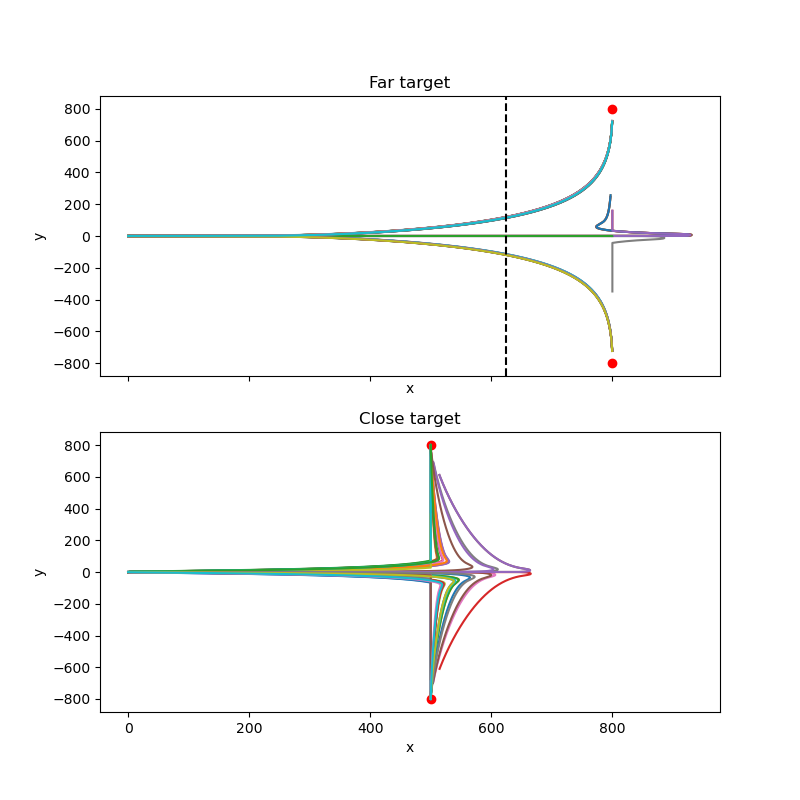

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

for r in res_far:
    plot_traj_ax(r, params_far, ax[0])

for r in res_close:
    plot_traj_ax(r, params_close, ax[1])

# plot_traj_ax(res_close[3], params_close, ax[1])

ax[0].scatter(params_far[5], params_far[6], c='r')
ax[0].scatter(params_far[5], -params_far[6], c='r')
ax[0].axvline(params_far[6]/np.tan(params_far[4]), c='black', ls='--')
ax[0].set_title('Far target')
ax[1].scatter(params_close[5], params_close[6], c='r')
ax[1].scatter(params_close[5], -params_close[6], c='r')
ax[1].set_title('Close target')
plt.show()

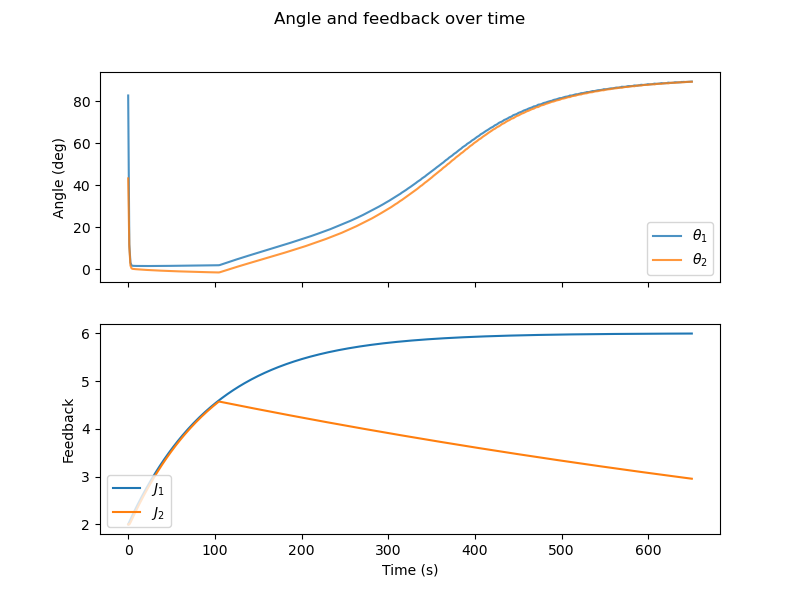

In [20]:
plot_thetasJs(res_far[0])

In [2]:
# FAR TARGETS

res_far = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_far = [0.01, 0.0008, 60, 6, np.radians(52), 800, 800]

#time points
t = np.linspace(0, 650, 500)

for _ in range(5):
    # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
    x0 = [0, 0, np.random.uniform(-np.pi/2, np.pi/2), np.random.uniform(-np.pi/2, np.pi/2), 6, 6]
    res_far.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_far), [t[0], t[-1]], x0, t_eval=t))

############################################################################################################

# CLOSE TARGET

res_close = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_close = [0.01, 0.0008, 60, 6, np.radians(52), 500, 800]

for _ in range(5):
    # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
    x0 = [0, 0, np.random.uniform(-np.pi/2, np.pi/2), np.random.uniform(-np.pi/2, np.pi/2), 6, 6]
    res_close.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_close), [t[0], t[-1]], x0, t_eval=t))

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

for r in res_far:
    plot_traj_ax(r, params_far, ax[0])

for r in res_close:
    plot_traj_ax(r, params_close, ax[1])

# plot_traj_ax(res_close[3], params_close, ax[1])

ax[0].scatter(params_far[5], params_far[6], c='r')
ax[0].scatter(params_far[5], -params_far[6], c='r')
ax[0].axvline(params_far[6]/np.tan(params_far[4]), c='black', ls='--')
ax[0].set_title('Far target')
ax[1].scatter(params_close[5], params_close[6], c='r')
ax[1].scatter(params_close[5], -params_close[6], c='r')
ax[1].set_title('Close target')
plt.show()

## Numerical solution of equilibrium equations

In [10]:
# solve system of two equations using fsolve from scipy.optimize
def equation_2D(vars, params):
    x, y, u, v = vars
    alpha, beta, J12, Jmax, theta0, omega = params
    return  (-J12*np.sin(x-y) - u*np.sin(x-omega),

            J12*np.sin(x-y) - v*np.sin(y+omega),

            alpha*(Jmax-u) * theta_heav(theta0 - abs(x-omega)) - beta*u*(theta_heav(abs(x-omega) - theta0)),
            
            alpha*(Jmax-v) * theta_heav(theta0 - abs(y+omega)) - beta*v*(theta_heav(abs(y+omega) - theta0)))

Numerical solution
theta_1:  5.104853172066544e-13
theta_2:  -5.093096294111099e-13
J1:  8.30699561354008e-15
J2:  8.30699561354008e-15


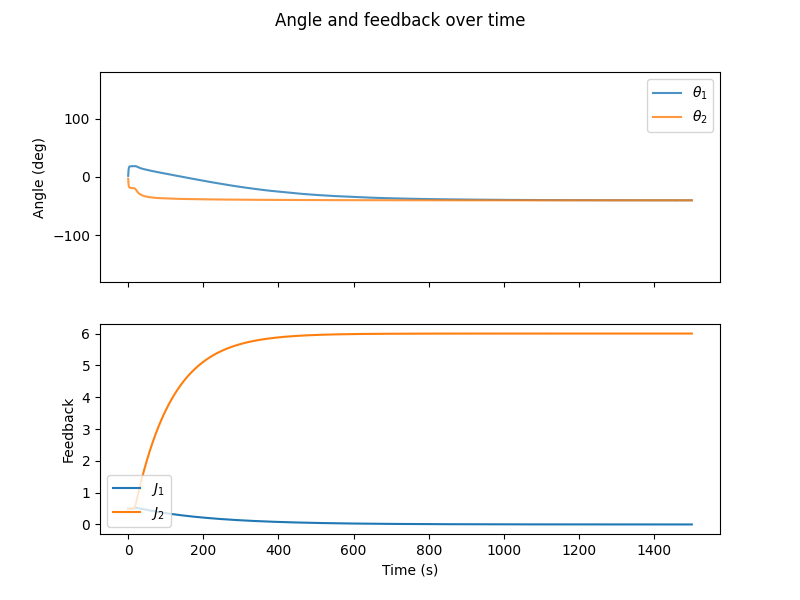

In [11]:
theta0 = np.radians(20)
omega = np.radians(40)

#        alpha, beta, J12, Jmax, theta0, omega
params = [0.01, 0.005, .3, 6, theta0, omega]
x0 = (np.radians(2),np.radians(-3),0.5,0.5)
guess = (np.radians(0),np.radians(0),0,4)
#x01 = (np.radians(0),0,0.5,0.5)


res =  fsolve(equation_2D, x0=guess, args=(params))
# print x, y, u, v separately
print('Numerical solution')
# print x
print('theta_1: ', np.degrees(res[0]))
print('theta_2: ', np.degrees(res[1]))
print('J1: ', res[2])
print('J2: ', res[3])


# ODE solver

t = np.linspace(0, 1500, 8000)

#initial conditions (theta1, theta2, J1, J2)
res_ODE = integrate.solve_ivp(lambda t, x: f_2D(x, t, params), [t[0], t[-1]], x0, t_eval=t)

plot_results(res_ODE)

**NOTE:** For this parameters and initial conditions (that are also the initial guess of the root for the numerical solution) I find a numerical solution that doesn't match the solution of the ODEs.

`params = [0.01, 0.005, .3, 5, np.radians(20), np.radians(40)]`

`x0 = (np.radians(0),np.radians(0),0.5,0.5)`

In [7]:
alpha = 0.2
beta = 0.005
J12 = 12
Jmax = 10
theta0 = np.radians(20)
Jinit = 6

t = np.linspace(0, 10000, 60000)
#res2 = []

#open file and write header
with open(f'res/a{alpha}_b{beta}_Ji{Jinit}_J12{J12}_Jm{Jmax}_t{np.degrees(theta0)}.txt', 'w') as f:
    # write parameters in the first line
    f.write(f'alpha\tbeta\tJinit\tJ12\tJmax\ttheta0\n')
    f.write(f'{alpha}\t{beta}\t{Jinit}\t{J12}\t{Jmax}\t{theta0}\n\n')
    
    f.write('omega\ttheta1_i\ttheta2_i\ttheta1_f\ttheta2_f\tJ1_f\tJ2_f\n')

    # solve the system of equations for different omega and different initial conditions on theta1 and theta2
    for omega in np.linspace(0, np.radians(90), 30):
        params = [alpha, beta, J12, Jmax, theta0, omega]
        for theta1 in np.linspace(np.radians(-90), np.radians(90), 15):
            for theta2 in np.linspace(np.radians(-90), np.radians(90), 15):
                x0 = (theta1, theta2, Jinit, Jinit)
                res_ODE = odeint(f_2D, x0, t, args=(params,))
                #res_ODE = integrate.solve_ivp(lambda t, x: f_2D(x, t, params), [t[0], t[-1]], x0, t_eval=t)
                #f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE.y[0,-1]}\t{res_ODE.y[1,-1]}\t{res_ODE.y[2,-1]}\t{res_ODE.y[3,-1]}\n')
                f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE[-1, 0]}\t{res_ODE[-1, 1]}\t{res_ODE[-1, 2]}\t{res_ODE[-1, 3]}\n')

# TIME INDIPENDENT MODEL

In [25]:
def f_tindip(x, t, params):
    theta1, theta2 = x
    J12, Jmax, theta0, omega = params
    return [
            -J12*np.sin(theta1-theta2) - Jmax*np.sin(theta1-omega)*theta_heav(theta0 - abs(theta1-omega)),  # Theta 1
            J12*np.sin(theta1-theta2) - Jmax*np.sin(theta2+omega)*theta_heav(theta0 - abs(theta2+omega))    # Theta 2                                                   
           ]

# plotting functions
def plot_results_tindip(res):
    fig, ax = plt.subplots(1, sharex=True, figsize=(8, 6))
    ax.plot(res.t, np.degrees(res.y[0]), label=r'$\theta_1$', alpha=.8)
    ax.plot(res.t, np.degrees(res.y[1]), label=r'$\theta_2$', alpha=.8)
    ax.set_ylabel('Angle (deg)')
    ax.set_ylim(-180, 180)
    ax.legend()
    ax.set_xlabel('Time (s)')
    plt.show()

In [26]:
J12 = 3
Jmax = 6
theta0 = np.radians(20)

t = np.linspace(0, 1500, 6000)

#open file and write header
with open(f'res_tindip/J12{J12}_Jm{Jmax}_t{np.degrees(theta0)}.txt', 'w') as f:
    # write parameters in the first line
    f.write(f'J12\tJmax\ttheta0\n')
    f.write(f'{J12}\t{Jmax}\t{theta0}\n\n')
    
    f.write('omega\ttheta1_i\ttheta2_i\ttheta1_f\ttheta2_f\n')

    # solve the system of equations for different omega and different initial conditions on theta1 and theta2
    for omega in np.linspace(0, np.radians(90), 30):
        params = [J12, Jmax, theta0, omega]
        for theta1 in np.linspace(np.radians(-90), np.radians(90), 15):
            for theta2 in np.linspace(np.radians(-90), np.radians(90), 15):
                x0 = (theta1, theta2)
                res_ODE = odeint(f_tindip, x0, t, args=(params,))
                f.write(f'{omega}\t{theta1}\t{theta2}\t{res_ODE[-1, 0]}\t{res_ODE[-1, 1]}\n')

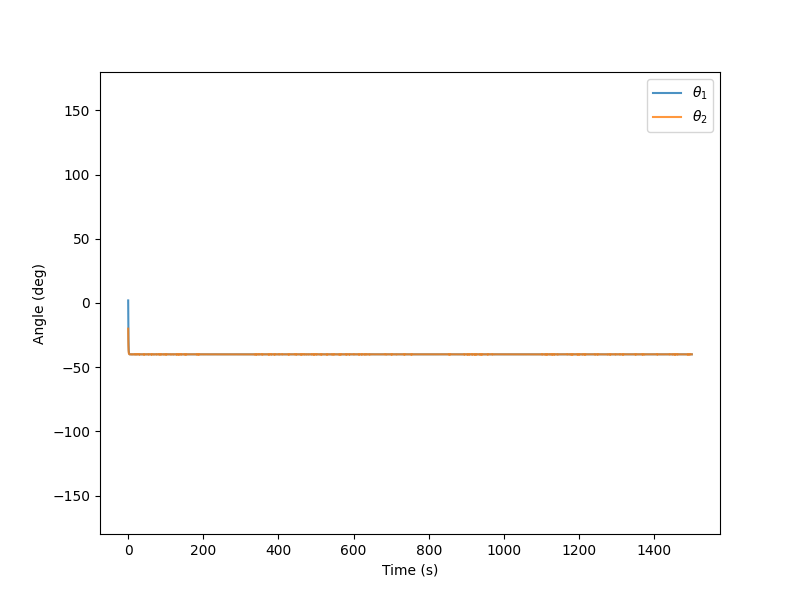

In [19]:
theta0 = np.radians(20)
omega = np.radians(40)

#        J12, Jmax, theta0, omega
params = [3, 6, theta0, omega]
x0 = (np.radians(2),np.radians(-20))

# ODE solver

t = np.linspace(0, 1500, 8000)

#initial conditions (theta1, theta2, J1, J2)
res_ODE_tindip = integrate.solve_ivp(lambda t, x: f_tindip(x, t, params), [t[0], t[-1]], x0, t_eval=t)

plot_results_tindip(res_ODE_tindip)